In [20]:
import numpy as np
import math
import csv
import matplotlib.pyplot as plt  
from IPython.display import display
%matplotlib inline 

def output_results(input_file,output_file):
    #define parameters
    l=[]
    r=[]
    d=[]
    m=[]
    result=[]
    distance_l=[]
    distance_r=[]
    direction=[]
    
    n_tot=22014
    rad=0.155
    R=0.4
    
    #input raw data
    with open(input_file) as f:
        c=csv.reader(f,delimiter = '\t')
        for line in c:
            result.extend(line)
    #-------save it as a list-------
    #l and r are the lists of number while d is the list of string
    for i in range(0,len(result)):
        if i%3 == 0:
            d.append(result[i])
        if (i-1)%3 ==0:
            l.append(result[i])
        if (i-2)%3 == 0:
            r.append(result[i])        
        l=[int(i) for i in l]
        r=[int(i) for i in r]
    
    #transform number of impulses to distance
    for i in range(1,int(len(l)/2)+1):
        result=2*math.pi*rad*(l[i*2]-l[i*2-1])/n_tot
        distance_l.append(result)
        results=2*math.pi*rad*(r[i*2]-r[i*2-1])/n_tot
        distance_r.append(results)

    distance_total=np.zeros(len(distance_l))
    for i in range(0,len(d)):
        if i%2 !=0:
            direction.append(d[i])
    
    #analyze data and save it 
    RESULTS=open(output_file,'w')
    for i in range(0,len(direction)):
        if direction[i] != 'f' and direction[i] != 'b':
            distance_total[i] = -(distance_l[i] + distance_r[i])/2/2/math.pi/R*360

            RESULTS.write('The {} interval is turning whose angles are : '.format(i) + str(distance_total[i]) + '\n')
        else:
            distance_total[i] = ((distance_r[i] - distance_l[i])/2)

            RESULTS.write('The {} interval is moving whose distances are : '.format(i) + str(distance_total[i]) + '\n')

    #assuming the robot starts from point(0,0), and now we are going to depict its every stop point. 
    RESULTS.write('\nthe starting point is (0,0)'+'\n')
    x=0
    y=0
    theta=0
    X=[0]
    Y=[0]
    for i in range(0, len(distance_total)):
        if direction[i] != 'f' and direction[i] != 'b':
            theta=theta+distance_total[i]
        else:
            x = x + distance_total[i]*math.sin(theta/360*2*math.pi)
            y = y + distance_total[i]*math.cos(theta/360*2*math.pi)
        
        X.append(x)
        Y.append(y)
       
        RESULTS.write('now the robot is on({:.3f}, {:.3f}, {:.3f})'.format(x,y,float(theta))+'\n')
    #plotting
    print(distance_total)
    plt.grid(True)
    plt.plot(X,Y,'cx--') 
    plt.show()

[  94.14697465 -107.75858545   -0.40547937]


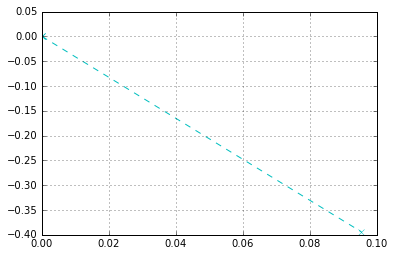

In [22]:
output_results('output_result.txt','result.txt')